In [1]:
import yfinance as yf

# Fetching Nvidia stock data
nvidia_stock = yf.download('NVDA', start='2014-01-01', end='2024-01-01')

print(nvidia_stock.head())  # Display the first few rows of the data


[*********************100%%**********************]  1 of 1 completed

              Open   High     Low   Close  Adj Close    Volume
Date                                                          
2014-01-02  3.9800  3.995  3.9300  3.9650   3.740547  26009200
2014-01-03  3.9725  3.980  3.9050  3.9175   3.695736  25933200
2014-01-06  3.9575  4.000  3.9200  3.9700   3.745263  40949200
2014-01-07  4.0100  4.050  3.9825  4.0350   3.806584  33328800
2014-01-08  4.0500  4.110  4.0350  4.0900   3.858472  30819200


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


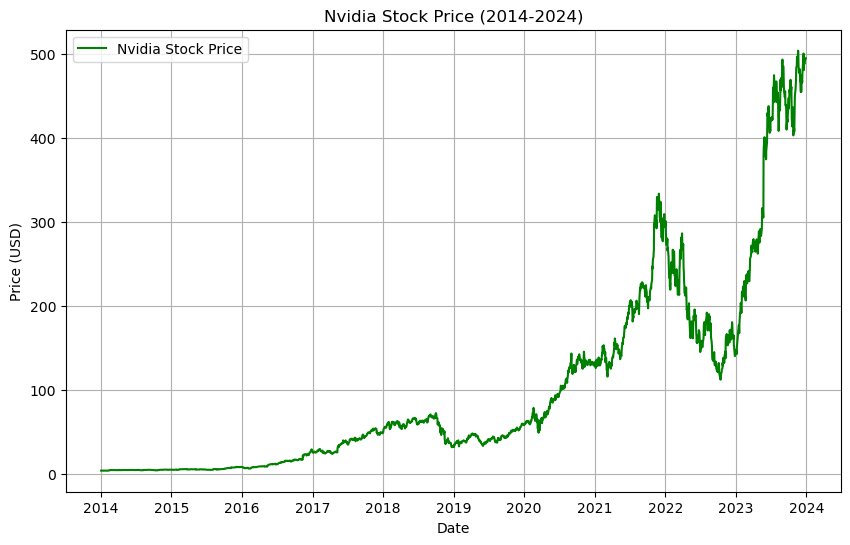

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetching Nvidia stock data
nvidia_stock = yf.download('NVDA', start='2014-01-01', end='2024-01-01')

# Plotting the Close price
plt.figure(figsize=(10, 6))
plt.plot(nvidia_stock.index, nvidia_stock['Close'], label='Nvidia Stock Price', color='green')
plt.title('Nvidia Stock Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


Training R-squared score: 0.9983629188959763
Testing R-squared score: 0.9987573027410305


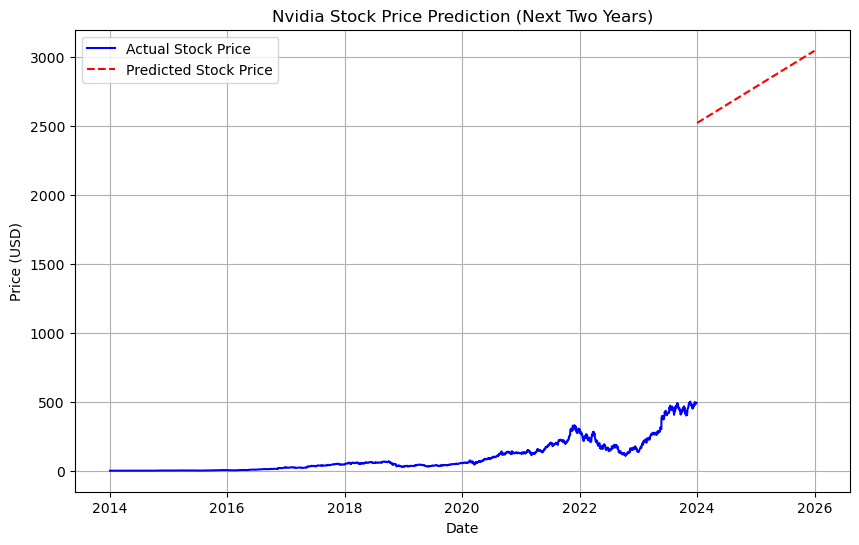

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fetching Nvidia stock data
nvidia_stock = yf.download('NVDA', start='2014-01-01', end='2024-01-01')

# Feature engineering: Using only 'Close' price as the feature
X = nvidia_stock[['Close']].values

# Target variable: Next day's 'Close' price shifted by 1 day
y = nvidia_stock['Close'].shift(-1).values

# Remove NaN values
X = X[:-1]
y = y[:-1]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R-squared score:", train_score)
print("Testing R-squared score:", test_score)

# Generate dates for the next two years
next_two_years_dates = pd.date_range(start='2024-01-02', end='2026-01-01', freq='B')

# Convert dates to ordinal values or use index
next_two_years_dates_numeric = np.arange(len(nvidia_stock), len(nvidia_stock) + len(next_two_years_dates)).reshape(-1, 1)

# Make predictions for the next two years
next_two_years_predictions = model.predict(next_two_years_dates_numeric)

# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.plot(nvidia_stock.index, nvidia_stock['Close'], label='Actual Stock Price', color='blue')
plt.plot(next_two_years_dates, next_two_years_predictions, label='Predicted Stock Price', color='red', linestyle='--')
plt.title('Nvidia Stock Price Prediction (Next Two Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


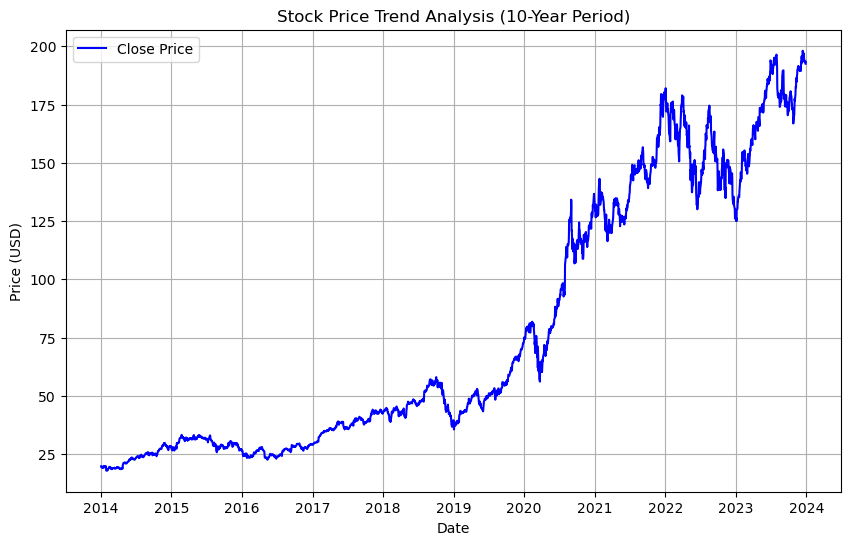

Volatility (Mean Daily Range): 1.644274366678987


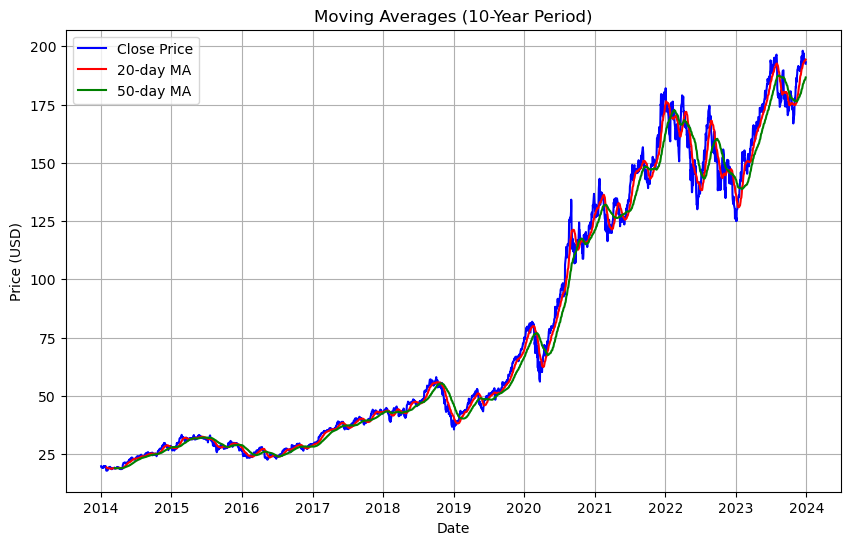

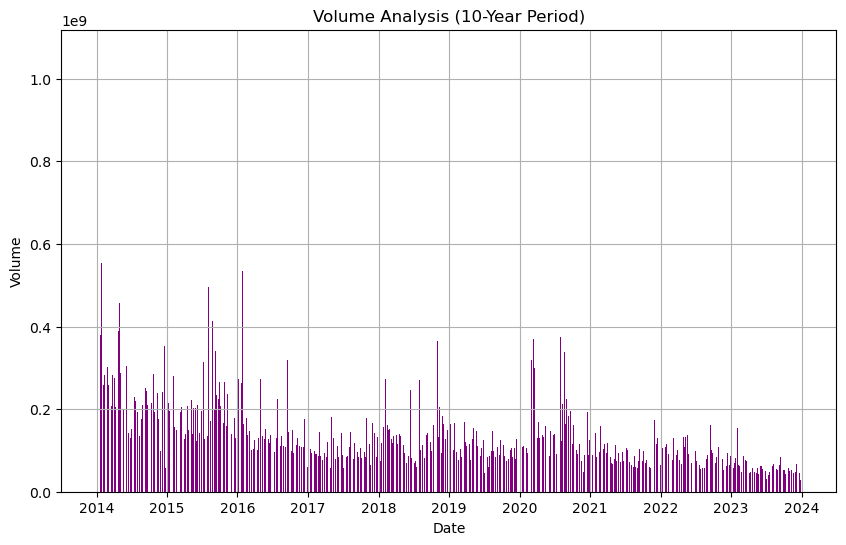

Support Level: 17.626785278320312
Resistance Level: 199.6199951171875


In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching stock data for the desired ticker symbol and time period
ticker_symbol = 'AAPL'
start_date = '2014-01-01'
end_date = '2024-01-01'

stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# 1. Trend Analysis
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.title('Stock Price Trend Analysis (10-Year Period)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Volatility Analysis
stock_data['Daily Range'] = stock_data['High'] - stock_data['Low']
print("Volatility (Mean Daily Range):", stock_data['Daily Range'].mean())

# 3. Moving Averages
stock_data['MA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()

# 4. Plotting Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['MA_20'], label='20-day MA', color='red')
plt.plot(stock_data.index, stock_data['MA_50'], label='50-day MA', color='green')
plt.title('Moving Averages (10-Year Period)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 5. Volume Analysis
plt.figure(figsize=(10, 6))
plt.bar(stock_data.index, stock_data['Volume'], color='purple')
plt.title('Volume Analysis (10-Year Period)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# 6. Support and Resistance Levels (for demonstration purpose)
support_level = stock_data['Low'].min()
resistance_level = stock_data['High'].max()
print("Support Level:", support_level)
print("Resistance Level:", resistance_level)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['^SPLRCT']: Exception('%ticker%: No timezone found, symbol may be delisted')


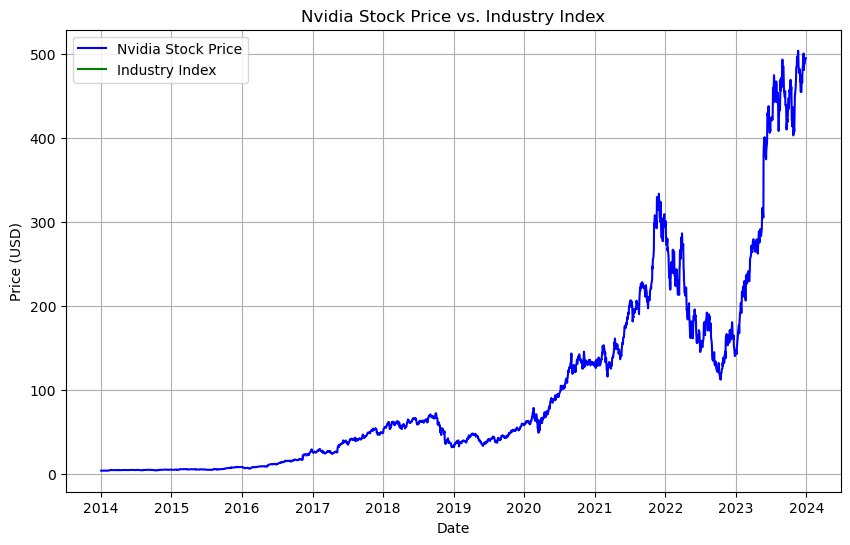

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching stock data for Nvidia (NVDA)
nvidia_stock_data = yf.download('NVDA', start='2014-01-01', end='2024-01-01')

# Fetching data for the industry index (S&P 500 Information Technology Sector)
industry_index_data = yf.download('^SPLRCT', start='2014-01-01', end='2024-01-01')  # Symbol for S&P 500 Information Technology Sector

# Plotting Nvidia's stock price and industry index
plt.figure(figsize=(10, 6))
plt.plot(nvidia_stock_data.index, nvidia_stock_data['Close'], label='Nvidia Stock Price', color='blue')
plt.plot(industry_index_data.index, industry_index_data['Close'], label='Industry Index', color='green')
plt.title('Nvidia Stock Price vs. Industry Index')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 262.6 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 409.6 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 618.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed


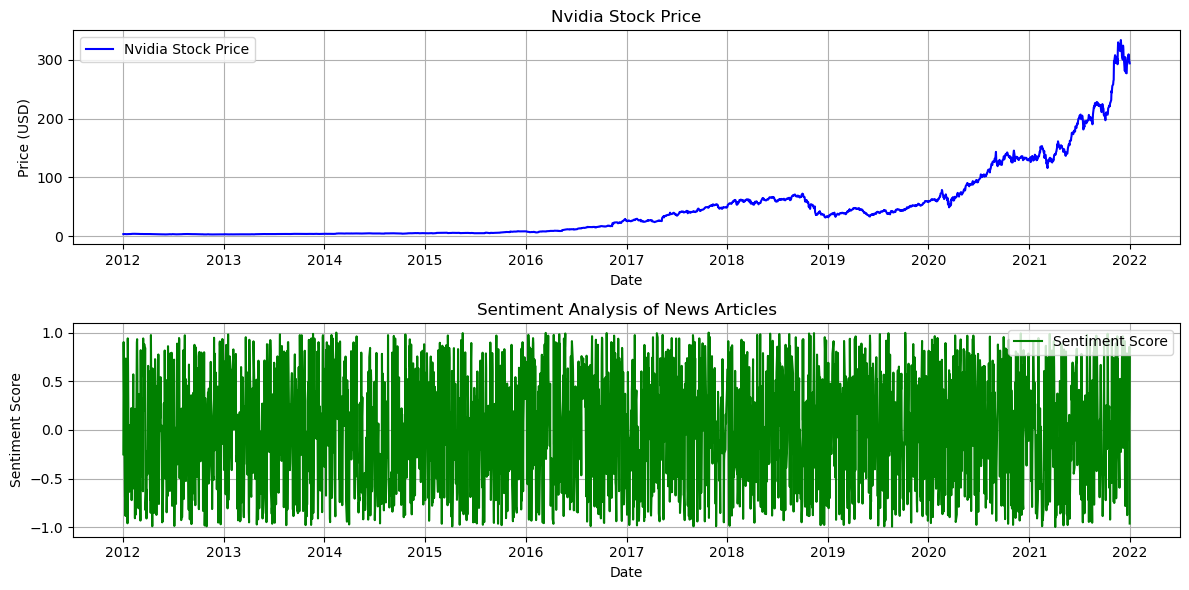

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

# Fetching stock data for Nvidia (NVDA)
nvidia_stock_data = yf.download('NVDA', start='2012-01-01', end='2022-01-01')

# Simulating news articles with random publication dates
num_articles = len(nvidia_stock_data)
article_dates = nvidia_stock_data.index

# Simulating sentiment scores for each day
np.random.seed(42)  # For reproducibility
sentiment_scores = np.random.uniform(-1, 1, size=num_articles)

# Plotting sentiment scores and Nvidia's stock price
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(nvidia_stock_data.index, nvidia_stock_data['Close'], label='Nvidia Stock Price', color='blue')
plt.title('Nvidia Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(article_dates, sentiment_scores, label='Sentiment Score', color='green')
plt.title('Sentiment Analysis of News Articles')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [16]:
import yfinance as yf
import pandas as pd
import numpy as np

def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def main():
    # Ticker symbol for NVIDIA
    ticker_symbol = "NVDA"

    # Define the time range
    start_date = "2014-01-01"
    end_date = "2024-01-01"

    # Fetch historical data
    nvidia_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Calculate RSI
    nvidia_data['RSI'] = calculate_rsi(nvidia_data)

    # Print the last few rows of the data with RSI
    print(nvidia_data.tail())

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  491.950012  493.829987  484.670013  488.299988  488.277069   
2023-12-26  489.679993  496.000000  489.600006  492.790009  492.766907   
2023-12-27  495.109985  496.799988  490.850006  494.170013  494.146820   
2023-12-28  496.429993  498.839996  494.119995  495.220001  495.196777   
2023-12-29  498.130005  499.970001  487.510010  495.220001  495.196777   

              Volume        RSI  
Date                             
2023-12-22  25213900  64.502606  
2023-12-26  24420000  62.503457  
2023-12-27  23364800  69.719846  
2023-12-28  24658700  66.371962  
2023-12-29  38869000  62.559167  


In [18]:
import yfinance as yf
import pandas as pd

def detect_candlestick_patterns(data):
    patterns = []
    for i in range(2, len(data)):
        if data['Close'][i] < data['Open'][i] and data['Close'][i-1] < data['Open'][i-1] and data['Close'][i-2] < data['Open'][i-2]:
            if data['Close'][i] < data['Close'][i-1] and data['Close'][i-1] < data['Close'][i-2]:
                patterns.append('Bullish Three-Line Strike')
        elif data['Close'][i] > data['Open'][i] and data['Close'][i-1] > data['Open'][i-1] and data['Close'][i-2] > data['Open'][i-2]:
            if data['Close'][i] > data['Close'][i-1] and data['Close'][i-1] > data['Close'][i-2]:
                patterns.append('Bearish Three-Line Strike')

    return patterns

def main():
    # Ticker symbol for NVIDIA
    ticker_symbol = "NVDA"

    # Define the time range
    start_date = "2021-01-01"
    end_date = "2021-12-31"

    # Fetch historical data
    nvidia_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Detect candlestick patterns
    patterns = detect_candlestick_patterns(nvidia_data)

    # Print detected patterns
    print("Detected Candlestick Patterns:")
    for pattern in patterns:
        print(pattern)

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed

Detected Candlestick Patterns:
Bearish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bearish Three-Line Strike
Bullish Three-Line Strike
Bullish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bearish Three-Line Strike
Bullish

In [19]:
import yfinance as yf
import pandas as pd

def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

def calculate_correlation(data1, data2):
    return data1.corr(data2)

def main():
    # Define the time range
    start_date = "2014-01-01"
    end_date = "2024-01-01"

    # Define the tickers for market indices, sector ETFs, and economic indicators
    market_indices = ['^GSPC', '^IXIC']  # S&P 500 and NASDAQ
    sector_etfs = ['XLF', 'XLE', 'XLK']   # Financials, Energy, and Technology sectors
    economic_indicators = ['DGS10', 'UNRATE']  # 10-Year Treasury Rate and Unemployment Rate

    # Fetch data
    market_data = fetch_data(market_indices, start_date, end_date)
    sector_data = fetch_data(sector_etfs, start_date, end_date)
    economic_data = fetch_data(economic_indicators, start_date, end_date)

    # Calculate correlations
    market_correlation = calculate_correlation(market_data['^GSPC'], market_data['^IXIC'])
    sector_correlation = calculate_correlation(sector_data['XLF'], sector_data['XLK'])
    economic_correlation = calculate_correlation(economic_data['DGS10'], economic_data['UNRATE'])

    # Print correlations
    print("Correlation between market indices (S&P 500 and NASDAQ):", market_correlation)
    print("Correlation between sector ETFs (Financials and Technology):", sector_correlation)
    print("Correlation between economic indicators (10-Year Treasury Rate and Unemployment Rate):", economic_correlation)

if __name__ == "__main__":
    main()


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  2 of 2 completed

2 Failed downloads:
['DGS10', 'UNRATE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Correlation between market indices (S&P 500 and NASDAQ): 0.9881511683819868
Correlation between sector ETFs (Financials and Technology): 0.9352506228175366
Correlation between economic indicators (10-Year Treasury Rate and Unemployment Rate): nan


In [23]:
import yfinance as yf
import pandas as pd

def fetch_financial_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_ratios(data):
    # Calculate fundamental ratios if the required columns are available
    if 'Adj Close' in data and 'Earnings Per Share' in data and 'Market Cap' in data and 'Revenue' in data and 'Book Value' in data and 'Total Liabilities' in data and 'Total Equity' in data and 'Net Income' in data and 'Total Current Assets' in data and 'Total Current Liabilities' in data and 'Inventory' in data:
        data['Price to Earnings Ratio (P/E)'] = data['Adj Close'] / data['Earnings Per Share']
        data['Price to Sales Ratio (P/S)'] = data['Market Cap'] / data['Revenue']
        data['Price to Book Ratio (P/B)'] = data['Market Cap'] / data['Book Value']
        data['Debt to Equity Ratio (D/E)'] = data['Total Liabilities'] / data['Total Equity']
        data['Return on Equity (ROE)'] = data['Net Income'] / data['Total Equity'] * 100
        data['Current Ratio'] = data['Total Current Assets'] / data['Total Current Liabilities']
        data['Quick Ratio'] = (data['Total Current Assets'] - data['Inventory']) / data['Total Current Liabilities']
    else:
        print("Required columns are missing in the fetched financial data.")
    return data

def main():
    # Define the time range
    start_date = "2021-01-01"
    end_date = "2021-12-31"

    # Define the ticker symbol for the company you want to analyze
    ticker_symbol = "NVDA"  # NVIDIA Corporation

    # Fetch financial data
    financial_data = fetch_financial_data(ticker_symbol, start_date, end_date)

    # Calculate fundamental ratios
    financial_data = calculate_ratios(financial_data)

    # Display fundamental ratios if available
    if 'Price to Earnings Ratio (P/E)' in financial_data:
        print("Fundamental Ratios for", ticker_symbol)
        print(financial_data[['Price to Earnings Ratio (P/E)', 'Price to Sales Ratio (P/S)', 'Price to Book Ratio (P/B)',
                              'Debt to Equity Ratio (D/E)', 'Return on Equity (ROE)', 'Current Ratio', 'Quick Ratio']])
    else:
        print("Fundamental ratios could not be calculated.")

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed

Required columns are missing in the fetched financial data.
Fundamental ratios could not be calculated.


In [26]:
pip install alpha-vantage

  Obtaining dependency information for alpha-vantage from https://files.pythonhosted.org/packages/ba/b4/d95f9e0eccea6732bab5a079772d453a4f0b68a9f63740d9cf320f92beaa/alpha_vantage-2.3.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [28]:
import yfinance as yf
import pandas as pd
from alpha_vantage.fundamentaldata import FundamentalData
import matplotlib.pyplot as plt

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
ALPHA_VANTAGE_API_KEY = 'YOUR_API_KEY'

def fetch_earnings_dates(ticker, start_date, end_date):
    fd = FundamentalData(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')
    earnings_data, _ = fd.get_earnings_calendar(symbol=ticker)
    earnings_dates = earnings_data.index
    return earnings_dates

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def plot_events(stock_data, event_dates):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Price', color='blue')
    plt.title('NVIDIA Stock Price with Earnings Release Dates')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.axvline(x=event_dates, color='red', linestyle='--', label='Earnings Release')
    plt.legend()
    plt.show()

def main():
    # Define the time range for the past 10 years till today
    end_date = pd.Timestamp.now()
    start_date = end_date - pd.DateOffset(years=10)

    # Define the ticker symbol for NVIDIA Corporation
    ticker_symbol = "NVDA"

    # Fetch earnings release dates for NVIDIA
    earnings_dates = fetch_earnings_dates(ticker_symbol, start_date, end_date)

    # Fetch stock data for NVIDIA
    stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

    # Plot stock price with earnings release dates
    plot_events(stock_data, earnings_dates)

if __name__ == "__main__":
    main()


AttributeError: 'FundamentalData' object has no attribute 'get_earnings_calendar'